# Projeto 1: Análise de Comportamento de Compra - Olist E-commerce

## Objetivo de Negócio
Gerar insights acionáveis sobre quando e como os clientes compram para otimizar estratégias de marketing.

## Semana 1: Setup, Data Cleaning e EDA Inicial
Este notebook cobre a preparação e auditoria dos dados.

In [145]:
#Impotando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [146]:
#Dataframe Orders
df_orders = pd.read_csv('../dataset-olist/olist_orders_dataset.csv')

#Dataframe Itens
df_itens = pd.read_csv('../dataset-olist/olist_order_items_dataset.csv')

#Dataframe Pagamentos
df_payments = pd.read_csv('../dataset-olist/olist_order_payments_dataset.csv')

## Detalhamento do DataSet Olist


### Tabela 1 Orders
 - **order_id**: Identificador de cada pedido
 - **customer_id**: Identificador de cada cliente
 - **order_status**: Indica os seguintes estados (entregue, enviado, cancelado, indisponivel, faturado, processando, criado, aprovado)
 - **order_purchase_timestamp**: indica quando o cliente clicou em comprar
 - **order_approved_at**: Indica o horario em que a compra foi aprovada
 - **order_delivered_carrier_date**: Indica a data que o pedido chegou na transportadora
 - **order_delivered_customer_date**: Indica quando o pedido chegou no cliente
 - **order_estimated_delivery_date**: Indica a estimativa de quando o pedido chegara no cliente


### Tabela 2 Itens
 - **order_id**: Identificador do pedido
 - **order_item_id**: Identifica a quantidade de produtos de um pedido especifico
 - **product_id**: Identificador do produto
 - **seller_id**: Identificador do vendedor
 - **shipping_limit_date**: Data limite de envio
 - **price**: Indica o preço do item
 - **freight_value**: Indica o valor do frete


### Tabela 3 Pagamentos
 - **order_id**: Identificador do pedido
 - **payment_sequential**: Indica em quantos metodos o comprador fez o pagamento
 - **payment_type**: Indica de que maneira aquele pagamento especifico foi feito (cartão de crédito, boleto, voucher, cartão de débito, não definido)
 - **payment_installments**: Indica a quantidade de parcelas
 - **payment_value**: Indica o valor de um pagamento especifico

In [147]:
#Verificação de linhas e colunas

print("Shape of df_orders:", df_orders.shape)
print("Shape of df_itens:", df_itens.shape)
print("Shape of df_payments:", df_payments.shape)

Shape of df_orders: (99441, 8)
Shape of df_itens: (112650, 7)
Shape of df_payments: (103886, 5)


## Auditoria de Qualidade

Verificação de:
- Tipos de dados
- Valores nulos
- Duplicatas
- Outliers

In [148]:
print("Info df_orders:", df_orders.info())
print("Info df_itens:", df_itens.info())
print("Info df_payments:", df_payments.info())

<class 'pandas.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   order_id                       99441 non-null  str  
 1   customer_id                    99441 non-null  str  
 2   order_status                   99441 non-null  str  
 3   order_purchase_timestamp       99441 non-null  str  
 4   order_approved_at              99281 non-null  str  
 5   order_delivered_carrier_date   97658 non-null  str  
 6   order_delivered_customer_date  96476 non-null  str  
 7   order_estimated_delivery_date  99441 non-null  str  
dtypes: str(8)
memory usage: 6.1 MB
Info df_orders: None
<class 'pandas.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  str    
 1   order_ite

In [149]:
print("Null values in orders:\n", df_orders.isnull().sum())
print("\nNull values in itens:\n", df_itens.isnull().sum())
print("\nNull values in payments:\n", df_payments.isnull().sum())

Null values in orders:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Null values in itens:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Null values in payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [150]:
print(f"duplicated orders: {df_orders.duplicated().sum()}")
print(f"duplicated itens: {df_itens.duplicated().sum()}")
print(f"duplicated payments: {df_payments.duplicated().sum()}")

duplicated orders: 0
duplicated itens: 0
duplicated payments: 0


## Limpeza e Tratamento

### Decisões de Negócio:
1. **Manter apenas pedidos `delivered`**: Focar em comportamento de compra completo
2. **Remover nulos em datas críticas**: Necessário para análises temporais 
3. **Remover pagamentos `not_defined`**: Categoria sem valor analítico
4. **Manter outliers de valor**: Podem ser compras legítimas de alto ticket

In [151]:
#Convertendo as strings de Order que deveriam estar em formato datetime
orders_column = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in orders_column:
    df_orders[column] = pd.to_datetime(df_orders[column])

df_itens["shipping_limit_date"] = pd.to_datetime(df_itens["shipping_limit_date"])

In [152]:
#Limpando os valores nulos e pedidos que não foram entregues

df_orders_clean = df_orders[df_orders['order_status'] == 'delivered']
df_orders_clean = df_orders_clean.dropna()
df_orders_clean.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### Verificação de OutLiers Do Dataframe Payments

In [153]:
df_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


C:\Users\muril\AppData\Local\Temp\ipykernel_8408\1813996940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_payments, x='payment_value', palette= 'Set2')


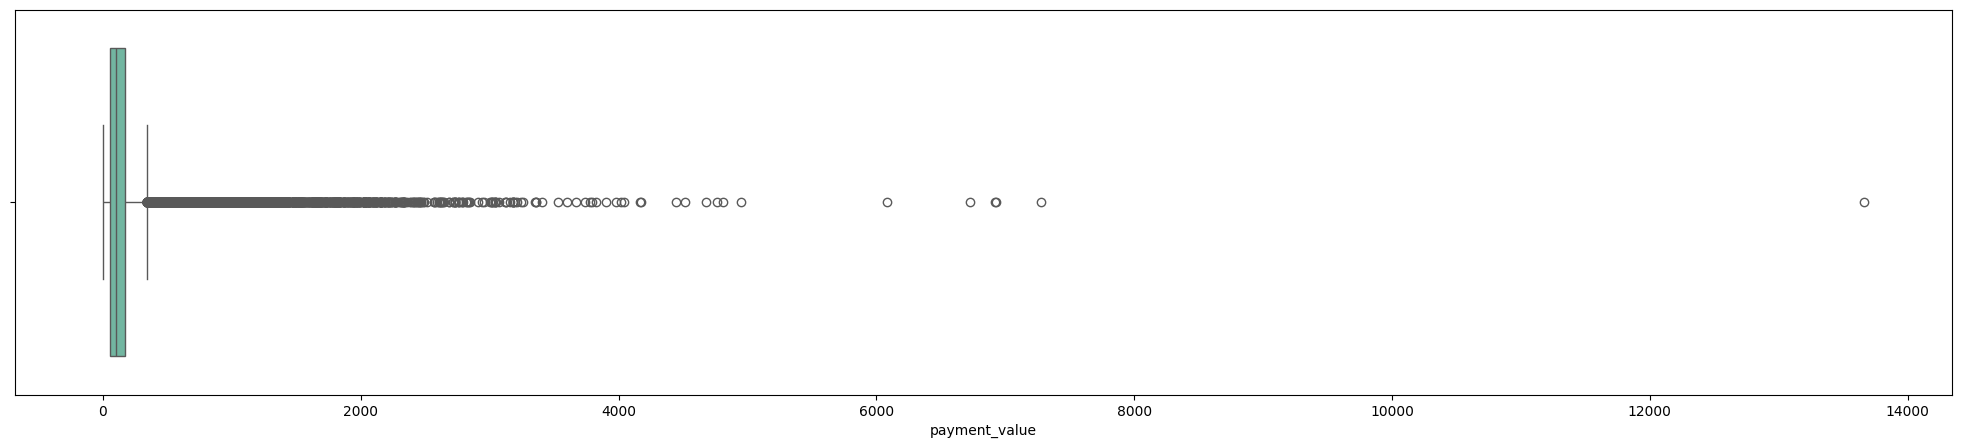

In [154]:
#BoxPlot dos valores de pagamento
plt.figure(figsize=(25, 5))
sns.boxplot(data=df_payments, x='payment_value', palette= 'Set2')
plt.show()

In [155]:
# Verificação do porque existia tipos de pagamento não definidos e por que estavam com valores 0
df_payments['payment_type'].value_counts()
not_defined_payments = df_payments[df_payments['payment_type'] == 'not_defined']
not_defined_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [156]:
#Remoção dos tipos de pagamento não definidos
df_payments_clean = df_payments.loc[df_payments['payment_type'] != 'not_defined']
df_payments_clean['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64

### Verificação de OutLiers Do Dataframe Itens

In [157]:
df_itens.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


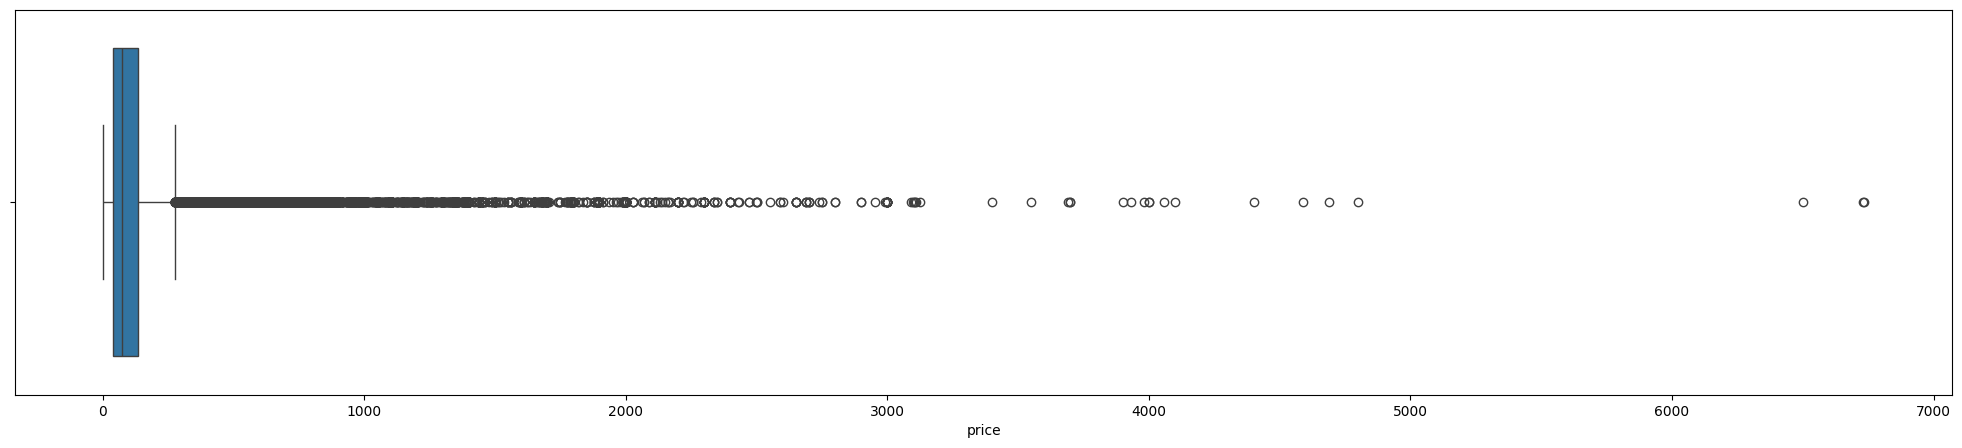

In [158]:
plt.figure(figsize=(25,5))
sns.boxplot(data=df_itens, x='price')
plt.show()

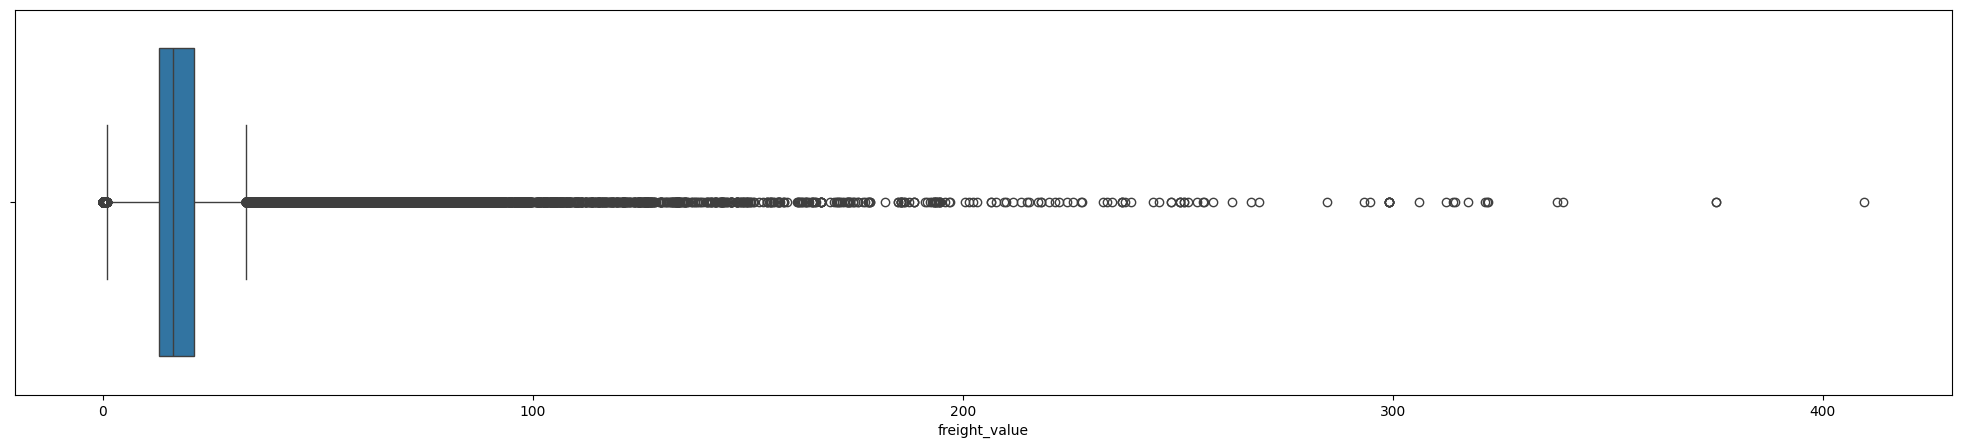

In [159]:
plt.figure(figsize=(25,5))
sns.boxplot(data=df_itens, x='freight_value')
plt.show()

In [160]:
duplicatas_itens = df_itens.duplicated(subset=['order_id', 'order_item_id']).sum()
print(f"Duplicatas de chave composta encontradas: {duplicatas_itens}")

Duplicatas de chave composta encontradas: 0


In [162]:
df_itens_clean = df_itens.copy()

#### Validação Final Da EDA inicial 

In [161]:
# Resumo da limpeza
print("=== RESUMO DA LIMPEZA ===\n")
print(f"Orders: {df_orders.shape[0]} → {df_orders_clean.shape[0]} ({df_orders.shape[0] - df_orders_clean.shape[0]} removidas)")
print(f"Payments: {df_payments.shape[0]} → {df_payments_clean.shape[0]} ({df_payments.shape[0] - df_payments_clean.shape[0]} removidas)")
print(f"Itens: {df_itens.shape[0]} (sem remoções)")

=== RESUMO DA LIMPEZA ===

Orders: 99441 → 96455 (2986 removidas)
Payments: 103886 → 103883 (3 removidas)
Itens: 112650 (sem remoções)


### Próximos passos

#### Criação de Features Temporais
Extrair de `order_purchase_timestamp`:

 - **Dia da Semana** (0=Segunda, 6=Domingo)
 - **Nome do Dia** 
 - **Mês** sazionalidade mensal
 - **Ano**
 - **Hora** (0 - 23)
 - **Periodo do Dia** (Madrugada: 0-6h, Manhã: 6-12h, Tarde: 12-18h, Noite: 18-24h)

#### Análise de Sazonalidade

 - Agrupar vendas por dia da semana (qual dia tem mais pedidos?)
 - Agrupar vendas por mês (há meses com picos? Black Friday? Natal?)
 - Criar gráfico de barras mostrando volume de pedidos por dia da semana

#### Identificação de Horários de Pico

 - Agrupar pedidos por hora do dia
 - Identificar horários com maior volume de conversões
 - Criar gráfico de linha mostrando distribuição ao longo do dia

#### Análise por Período do Dia

 - Comparar volume de vendas em cada período (Madrugada, Manhã, Tarde, Noite)
 - Identificar quando clientes preferem comprar
 - Criar gráfico de pizza ou barras

#### Análise Cruzada: Dia da Semana vs Hora

 - Criar uma tabela dinâmica cruzando Dia da Semana x Hora
 - Visualizar com heatmap (Seaborn) para identificar "sweet spots"
 - Interpretar: Ex: "Domingos à noite têm pico de conversões"

#### Insights de Negócio

 - Documentar em Markdown os 3 principais padrões encontrados
 - Traduzir para linguagem de negócio (ex: "Recomendamos aumentar investimento em ads nas quartas-feiras entre 20h-22h")
